# Base Imports

In [2]:
# Base imports
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
from holisticai.formatting import pandas_to_numpy

# Classification Bias Task

In [2]:
from holisticai.bias.plots import success_rate_plot
from holisticai.bias.plots import disparate_impact_plot
from holisticai.bias.plots import statistical_parity_plot

In [3]:
p_attr = np.array(['A']*100+['B']*100+['C']*300)
l = np.linspace(0,1,100)
y_pred = (np.array(list(l)+list(l**2)+3*list(l**3))>0.4)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Group', ylabel='Success Rate'>)

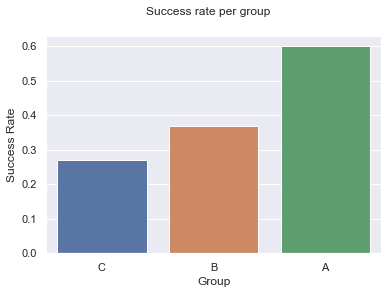

In [4]:
success_rate_plot(p_attr, y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Group', ylabel='Disparate Impact'>)

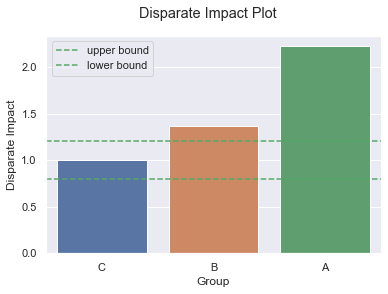

In [5]:
disparate_impact_plot(p_attr, y_pred, groups = ['A','B','C'])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Group', ylabel='Statistical Parity'>)

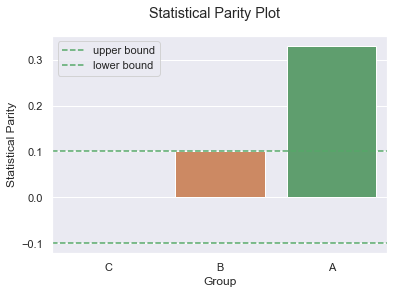

In [6]:
statistical_parity_plot(p_attr, y_pred, groups = ['A','B','C'])

# Regression Bias Task

In [3]:
from holisticai.bias.plots import regression_bias_plots
from holisticai.bias.plots import success_rate_curves

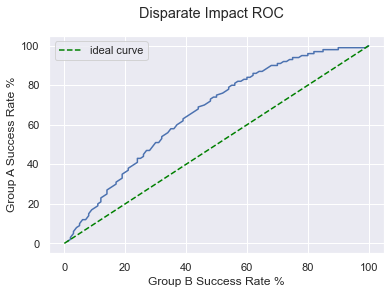

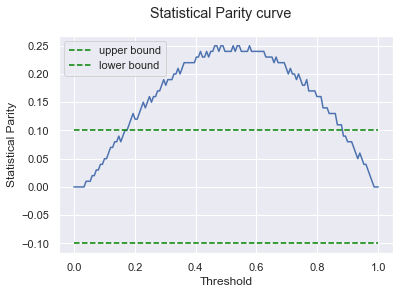

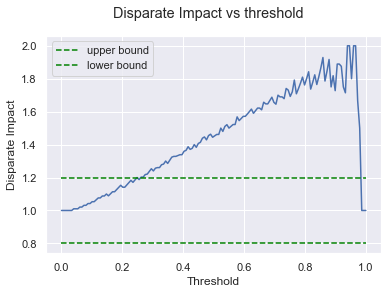

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Threshold'>)

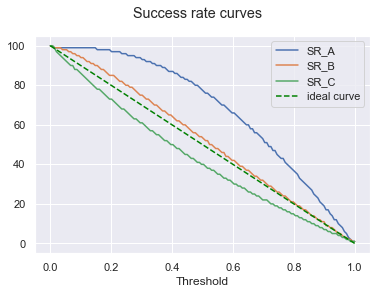

In [8]:
p_attr = np.array(['A']*100+['B']*100+['C']*300)
group_a = p_attr=='A'
group_b = p_attr=='B'
l = np.linspace(0,1,100)
y_pred = np.array(list(l)+list(l**2)+3*list(l**3))
regression_bias_plots(group_a, group_b, y_pred)
success_rate_curves(p_attr,y_pred)

# Recommender Bias Task

In [9]:
from holisticai.bias.plots import exposure_diff_plot

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Item', ylabel='group_a exposure - group_b exposure'>)

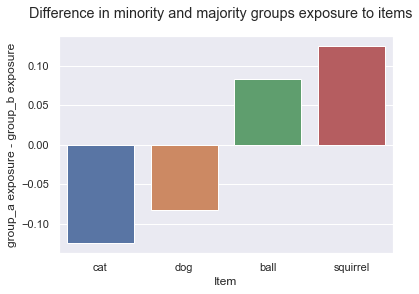

In [10]:
df = pd.read_csv('../data/small_test_recommender.csv')
group_a, group_b= pandas_to_numpy(df,cols = ['group_a','group_b'])
mat_pred = df[['item_1','item_2','item_3','item_4']].to_numpy()

exposure_diff_plot(group_a, group_b, mat_pred, top = 2, thresh = 0.5, normalize=True, item_names=['cat','dog','ball','squirrel'])

# Clustering Bias Task

In [11]:
from holisticai.bias.plots import pca_scatter_plot

In [12]:
p_attr = np.array(     ['A','A','A','A','B','B','B','B','C','C'])
y_pred = np.array([0,1,1,2,0,0,0,0,1,2])
y_true = np.array([0,1,0,2,0,0,1,0,1,2])
data = np.array(
    [[-1,1],
    [1,1],
    [1,1],
    [0,-1],
    [-1,1],
    [-1,1],
    [-1,1],
    [-1,1],
    [1,1],
    [0,-1]])
data = data + np.random.normal(scale=0.2,size=(10,2))
centroids = np.array(
    [[-2,1],
    [1,2],
    [0,-2]])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>)

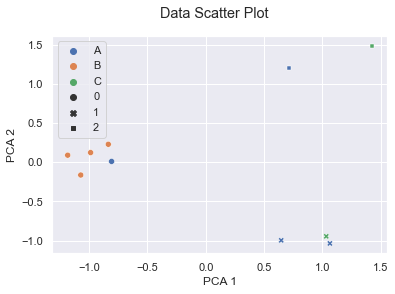

In [13]:
pca_scatter_plot(data, p_attr, y_pred)

# Multiclass Bias Task

In [14]:
p = np.array(     ['A','A','A','A','B','B','B','B','C','C'])
y_pred = np.array([0,1,2,0,1,2,0,1,2,0])
y_true = np.array([0,1,1,0,1,0,2,1,2,1])

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Class', ylabel='Group'>)

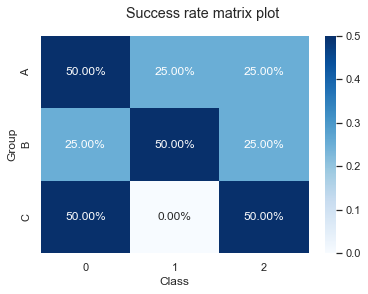

In [15]:
from holisticai.bias.plots import success_rate_matrix_plot
success_rate_matrix_plot(p, y_pred, groups=['A','B','C'], classes = [0,1,2])